Le but de cette étude est de prédire si une transaction est frauduleuse

In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.ticker as mtick
import plotly.express as px
sns.set(rc = {'figure.figsize':(15,8)})

Lecture des données

In [3]:
df = pd.read_csv('E:/Formation/Data_Science/Projets_DataScientest/fraud_detection/fraud.csv')
# affichage des 5 premières lignes
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud
0,22058,2015-02-24 22:55:49,2015-04-18 2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 7:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
# affichage des 5 dernières lignes
df.tail()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud
151107,345170,2015-01-27 3:03:34,2015-03-29 0:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 7:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 9:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0
151111,138208,2015-06-10 7:02:20,2015-07-21 2:03:53,20,ZINIADFCLHYPG,Direct,IE,M,38,4.103825e+09,0


In [10]:
# affichage de la taille du jeu de données
print(df.shape)
# le jeu de données se compose de 151112 lignes et 11 colonnes

(151112, 11)


In [11]:
# vérification du nombre de données
df.count()

user_id           151112
signup_time       151112
purchase_time     151112
purchase_value    151112
device_id         151112
source            151112
browser           151112
sex               151112
age               151112
ip_address        151112
is_fraud          151112
dtype: int64

In [12]:
# quelques informations sur le type des variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  is_fraud        151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [13]:
# affichage du nom des variables
list(df.columns)

['user_id',
 'signup_time',
 'purchase_time',
 'purchase_value',
 'device_id',
 'source',
 'browser',
 'sex',
 'age',
 'ip_address',
 'is_fraud']

In [8]:
# Extraction des variables catégorielles ou qualitatives
cat_var_names = ['user_id','device_id','source','browser','sex','age','ip_address','is_fraud']
df_cat = df[cat_var_names]
df_cat.head()

,user_id,device_id,source,browser,sex,age,ip_address,is_fraud
0,22058,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


Traitement des variables temporelles

In [9]:
temp_var = ['signup_time','purchase_time']
df_temp = df[temp_var]
df_temp.head()

,signup_time,purchase_time
0,2015-02-24 22:55:49,2015-04-18 2:47:11
1,2015-06-07 20:39:50,2015-06-08 1:38:54
2,2015-01-01 18:52:44,2015-01-01 18:52:45
3,2015-04-28 21:13:25,2015-05-04 13:54:50
4,2015-07-21 7:09:52,2015-09-09 18:40:53


Traitement des variables temporelles

In [10]:
import datetime

In [4]:
df['signup_time'] = pd.to_datetime(df['signup_time'], 
 format = '%Y-%m-%dT%H:%M:%S')

In [5]:
df['purchase_time'] = pd.to_datetime(df['signup_time'], 
 format = '%Y-%m-%dT%H:%M:%S')

Vérification des doublons

In [13]:
df.duplicated().sum()

0

Détection des valeurs manquantes

In [14]:
# detection des colonnes avec valeurs manquantes
df.isna().any(axis = 0)

user_id           False
signup_time       False
purchase_time     False
purchase_value    False
device_id         False
source            False
browser           False
sex               False
age               False
ip_address        False
is_fraud          False
dtype: bool

In [15]:
# detection des lignes avec des valeurs manquantes
df.isna().any(axis = 1)

0         False
1         False
2         False
3         False
4         False
          ...  
151107    False
151108    False
151109    False
151110    False
151111    False
Length: 151112, dtype: bool

In [16]:
# affichage des lignes contenant des valeurs manquantes
df[df.isna().any(axis=1)]

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud


In [17]:
# comptage des valeurs manquantes pour chaque colonne
df.isnull().sum(axis=0)

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
is_fraud          0
dtype: int64

In [18]:
# comptage des valeurs manquantes pour chaque ligne
df.isnull().sum(axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
151107    0
151108    0
151109    0
151110    0
151111    0
Length: 151112, dtype: int64

Aucunes valeurs manquantes

In [19]:
# nombre de valeurs uniques
df.user_id.value_counts()

2049      1
237601    1
154782    1
345459    1
192523    1
         ..
320544    1
298171    1
326366    1
304318    1
264191    1
Name: user_id, Length: 151112, dtype: int64

In [20]:
# nombre de valeurs uniques
df.device_id.value_counts()

ITUMJCKWEYNDD    20
EQYVNEGOFLAWK    20
KIPFSCNUGOLDP    20
CQTUVBYIWWWBC    20
NGQCKIADMZORL    20
                 ..
VPEUEJFIDDCLK     1
NOACFFLBQZAAF     1
WIDIMIQBWLAGU     1
WGHUWXVSEVEEU     1
IUITTODHUDENZ     1
Name: device_id, Length: 137956, dtype: int64

In [27]:
df.ip_address.value_counts()

1.502818e+09    20
2.050964e+09    20
5.760609e+08    20
3.874758e+09    20
3.058785e+09    19
                ..
8.134860e+08     1
1.812482e+09     1
2.891885e+08     1
1.528637e+09     1
1.464834e+09     1
Name: ip_address, Length: 143511, dtype: int64

In [28]:
df.source.value_counts()

SEO       60615
Ads       59881
Direct    30616
Name: source, dtype: int64

In [29]:
df.browser.value_counts()

Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: browser, dtype: int64

Les variables, user_id, device_id, ip_address ne seront pas utiles pour la modélisation, elles peuvent être supprimées

In [6]:
df = df.drop(['user_id', 'device_id', 'ip_address'], axis = 1)

In [7]:
df.head()

,signup_time,purchase_time,purchase_value,source,browser,sex,age,is_fraud
0,2015-02-24 22:55:49,2015-02-24 22:55:49,34,SEO,Chrome,M,39,0
1,2015-06-07 20:39:50,2015-06-07 20:39:50,16,Ads,Chrome,F,53,0
2,2015-01-01 18:52:44,2015-01-01 18:52:44,15,SEO,Opera,M,53,1
3,2015-04-28 21:13:25,2015-04-28 21:13:25,44,SEO,Safari,M,41,0
4,2015-07-21 07:09:52,2015-07-21 07:09:52,39,Ads,Safari,M,45,0


Traitement des variables quantitatives

In [7]:
# Extraction des variables quantitatives
num_var_names = ['purchase_value','age']
df_num = df[num_var_names]
df_num.head()

,purchase_value,age
0,34,39
1,16,53
2,15,53
3,44,41
4,39,45


In [8]:
# description des variables quantitatives
df_num.describe()

,purchase_value,age
count,151112.000000,151112.000000
mean,36.935372,33.140704
std,18.322762,8.617733
min,9.000000,18.000000
25%,22.000000,27.000000
50%,35.000000,33.000000
75%,49.000000,39.000000
max,154.000000,76.000000


In [34]:
df_num['age'].quantile(q=[0.25, 0.5, 0.75])

0.25    27.0
0.50    33.0
0.75    39.0
Name: age, dtype: float64

25% ont moins de 27 ans
50% ont moins de 33 ans
75% ont moins de 39 ans

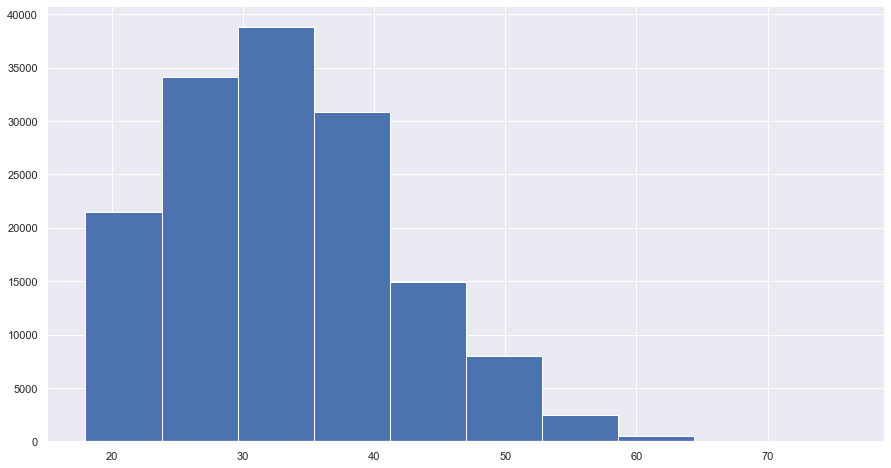

In [35]:
# Regardons la répartition de la variable age
df.age.hist(bins = 10);

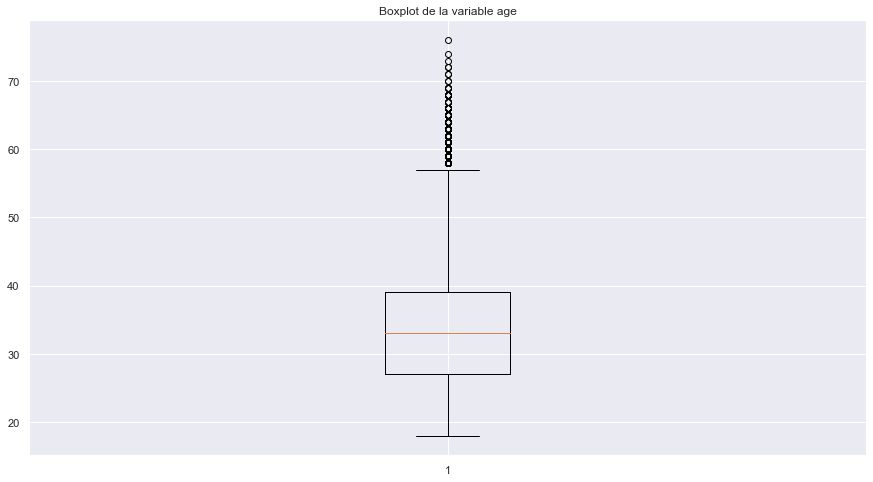

In [36]:
# boîte à moustache de la variable age
plt.boxplot(df.age)
plt.title('Boxplot de la variable age');

Quelques valeurs au-dessus de 60 ans

In [37]:
df[df['age'] == max(df['age'])]

,signup_time,purchase_time,purchase_value,source,browser,sex,age,is_fraud
137430,2015-03-08 06:49:53,2015-03-08 06:49:53,49,SEO,Chrome,F,76,0


L'âge maxi est de 76 ans

 Regardons l'âge déclarée des personnes qui ont effectué une transaction frauduleuse

In [8]:
df_f = df[df['is_fraud'] == 1]
df_f.head()

,signup_time,purchase_time,purchase_value,source,browser,sex,age,is_fraud
2,2015-01-01 18:52:44,2015-01-01 18:52:44,15,SEO,Opera,M,53,1
24,2015-01-11 01:51:15,2015-01-11 01:51:15,52,Direct,IE,F,35,1
25,2015-01-04 22:32:33,2015-01-04 22:32:33,31,SEO,FireFox,M,36,1
29,2015-01-07 03:44:53,2015-01-07 03:44:53,48,SEO,Chrome,F,27,1
59,2015-02-01 05:59:23,2015-02-01 05:59:23,36,SEO,IE,M,30,1


In [26]:
df_f.describe()

,purchase_value,age,is_fraud
count,14151.000000,14151.000000,14151.0
mean,36.993004,33.318281,1.0
std,18.397654,8.568001,0.0
min,9.000000,18.000000,1.0
25%,22.000000,27.000000,1.0
50%,35.000000,33.000000,1.0
75%,49.000000,39.000000,1.0
max,111.000000,68.000000,1.0


Regardons la proportion de transactions frauduleuses

In [27]:
print("la proportion de transactions frauduleuses : %.2f pourcents " %round(len(df_f)/len(df)*100,2))

la proportion de transactions frauduleuses : 9.36 pourcents 


l'age moyen déclarée des personnes qui ont effectué une transaction frauduleuse est de 33ans
l'age maxi est de 68 ans

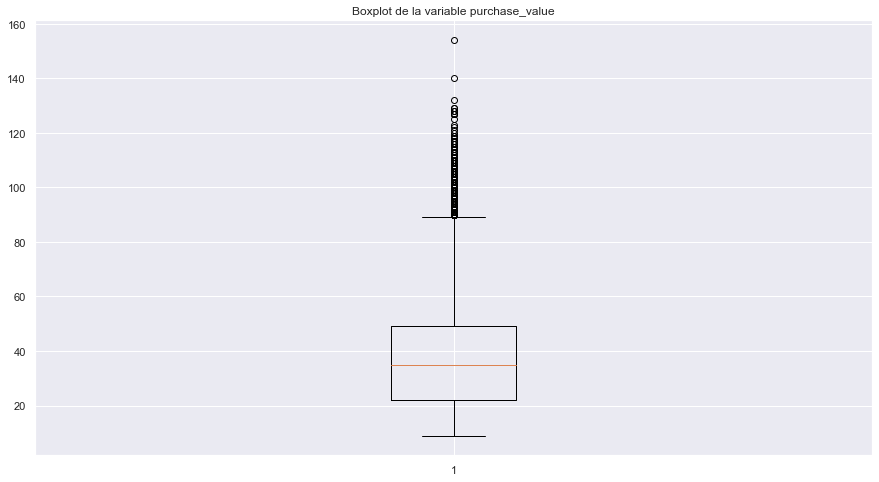

In [28]:
# boîte à moustache de la variable purchase_value
plt.boxplot(df_num.purchase_value)
plt.title('Boxplot de la variable purchase_value');

Quelques achats au-dessus de 80euros

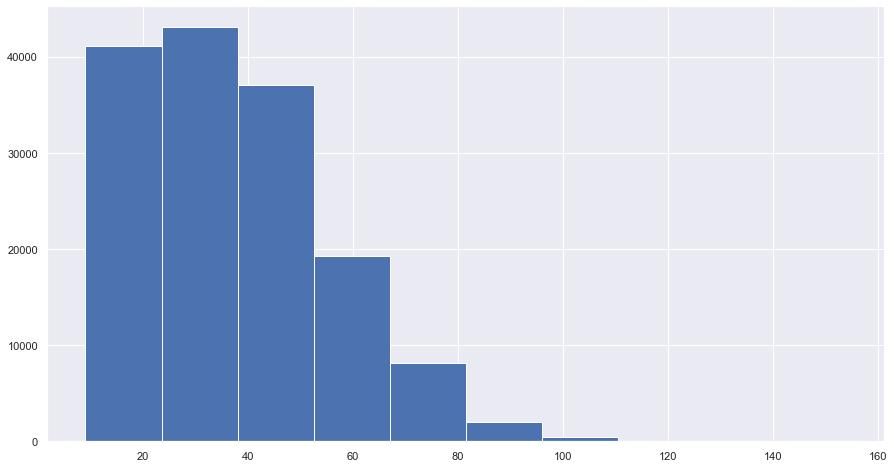

In [29]:
# Regardons la répartition de la variable purchase_value
df.purchase_value.hist(bins = 10);

In [30]:
df_f.describe()

,purchase_value,age,is_fraud
count,14151.000000,14151.000000,14151.0
mean,36.993004,33.318281,1.0
std,18.397654,8.568001,0.0
min,9.000000,18.000000,1.0
25%,22.000000,27.000000,1.0
50%,35.000000,33.000000,1.0
75%,49.000000,39.000000,1.0
max,111.000000,68.000000,1.0


Le montant moyen d'une transaction frauduleuse est de 33,32euros, le montant max de 111 euros
les transactions frauduleuses concernent des faibles montants

la majeure partie des achats est de moins de 40 euros

Traitement des variables qualitatives

In [31]:
# extraction des variables qualitatives
cat_data = df.select_dtypes(include='O')
cat_data.head()

,source,browser,sex
0,SEO,Chrome,M
1,Ads,Chrome,F
2,SEO,Opera,M
3,SEO,Safari,M
4,Ads,Safari,M


In [32]:
cat_data.source.value_counts()

SEO       60615
Ads       59881
Direct    30616
Name: source, dtype: int64

Regardons la distribution de la variable source parmi toutes les transactions frauduleuses

In [46]:
df_f.source.value_counts()

Ads       5513
SEO       5412
Direct    3226
Name: source, dtype: int64

<AxesSubplot:xlabel='source'>

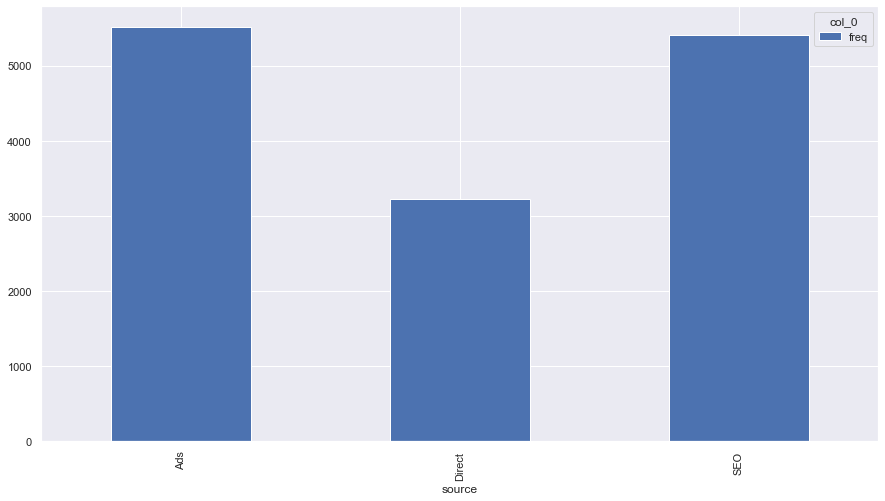

In [47]:
t1 = pd.crosstab(df_f.source, "freq")
t1.plot.bar()

ADS est la source la plus représentée parmi les transactions frauduleuses

In [48]:
cat_data.browser.value_counts()

Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: browser, dtype: int64

Regardons la distribution de la variable browser parmi toutes les transactions frauduleuses

In [49]:
df_f.browser.value_counts()

Chrome     6069
IE         3187
FireFox    2342
Safari     2225
Opera       328
Name: browser, dtype: int64

<AxesSubplot:xlabel='browser'>

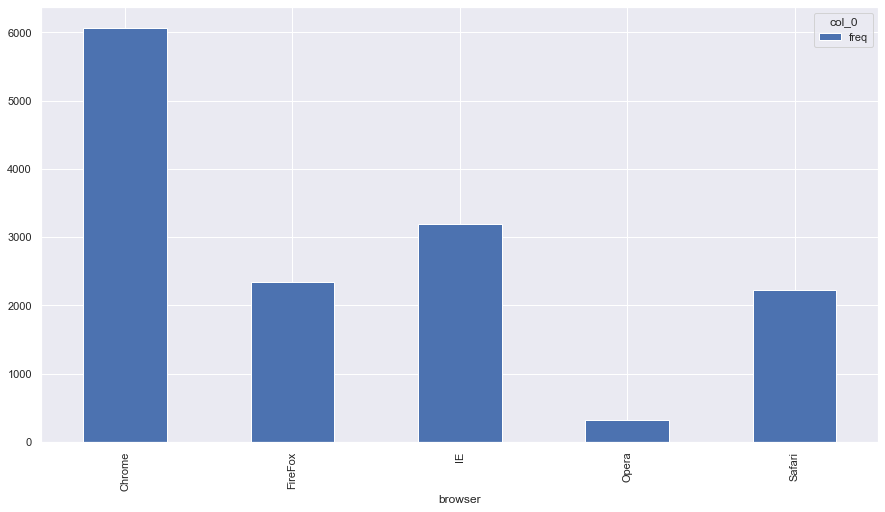

In [50]:
t2 = pd.crosstab(df_f.browser, "freq")
t2.plot.bar()

Chrome est le navigateur le plus représenté parmi les transactions frauduleuses

Regardons la distribution de la variable sex

In [51]:
cat_data.sex.value_counts()

M    88293
F    62819
Name: sex, dtype: int64

Parmi les transactions frauduleuses, regardons la distribution de la variable sex

In [52]:
df_f.sex.value_counts()

M    8434
F    5717
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex'>

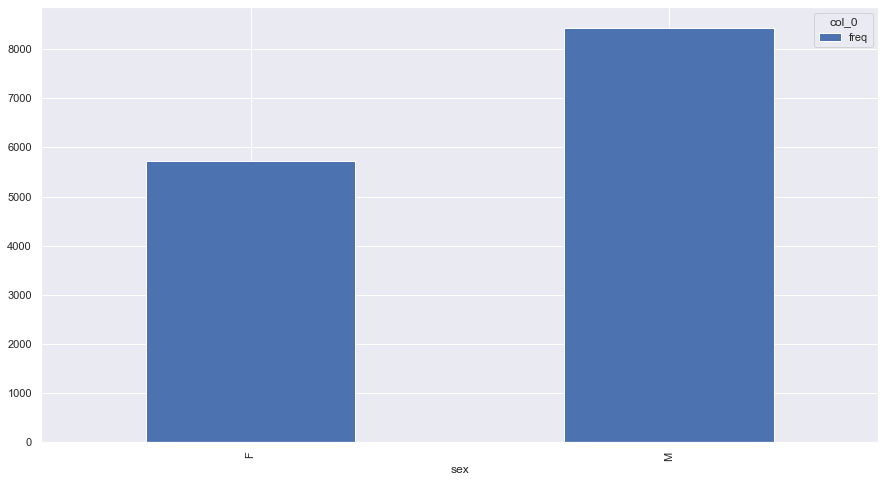

In [53]:
t3 = pd.crosstab(df_f.sex, "freq")
t3.plot.bar()

Le genre masculin est le plus représenté

Regardons les corrélations entre les variables 

In [33]:
# Corrélation entre purchase_value et is_fraud
import statsmodels.api 

result = statsmodels.formula.api.ols('purchase_value ~ is_fraud', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)

table
# la p-value (PR(>F)) est supérieur à 5% , l'hypothèse selon laquelle purchase_value n'influe pas sur is_fraud peut être
# posée.

,df,sum_sq,mean_sq,F,PR(>F)
is_fraud,1.0,5.185735e+01,51.857354,0.154464,0.694306
Residual,151110.0,5.073148e+07,335.725491,NaN,NaN


In [55]:
# Corrélation entre les variables sources et les variables is_fraud
table1 = pd.crosstab(df['source'],df['is_fraud'])
table1

is_fraud,0,1
source,,
Ads,54368,5513
Direct,27390,3226
SEO,55203,5412


In [56]:
from scipy.stats import chi2_contingency

resultats_test = chi2_contingency(table1)
statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]
print(statistique, p_valeur,degre_liberte)
# p-value < 5% donc on rejette H0 selon laquelles les variables sont indépendantes

64.92317707262569 7.981990836440143e-15 2


In [57]:
# Corrélation entre les variables browser et les variables is_fraud
table2 = pd.crosstab(df['browser'],df['is_fraud'])
table2

is_fraud,0,1
browser,,
Chrome,55363,6069
FireFox,22268,2342
IE,33540,3187
Opera,3348,328
Safari,22442,2225


In [58]:
from scipy.stats import chi2_contingency

resultats_test = chi2_contingency(table2)
statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]
print(statistique, p_valeur,degre_liberte)
# p-value < 5% donc on rejette H0 selon laquelles les variables sont indépendantes

44.556571734650184 4.916028350364759e-09 4


In [59]:
# Corrélation entre les variables sex et les variables is_fraud
table3 = pd.crosstab(df['sex'],df['is_fraud'])
table3

is_fraud,0,1
sex,,
F,57102,5717
M,79859,8434


In [60]:
from scipy.stats import chi2_contingency

resultats_test = chi2_contingency(table3)
statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]
print(statistique, p_valeur,degre_liberte)
# p-value < 5% donc on rejette H0 selon laquelles les variables sont indépendantes

8.76381632004166 0.003072654263243465 1


In [61]:
# Corrélation entre les variables age et les variables is_fraud
from scipy.stats import pearsonr

pd.DataFrame(pearsonr(df['age'], df['is_fraud']), index=['pearson_coeff','p-value'], columns=['resultat_test'])

#la p-value < 5%, le coefficient proche de 0, il y a une faible corrélation entre les deux variables.


,resultat_test
pearson_coeff,0.006624
p-value,0.010030


Regardons les variables temporelles 

In [62]:
df_f.head(30)

,signup_time,purchase_time,purchase_value,source,browser,sex,age,is_fraud
2,2015-01-01 18:52:44,2015-01-01 18:52:44,15,SEO,Opera,M,53,1
24,2015-01-11 01:51:15,2015-01-11 01:51:15,52,Direct,IE,F,35,1
25,2015-01-04 22:32:33,2015-01-04 22:32:33,31,SEO,FireFox,M,36,1
29,2015-01-07 03:44:53,2015-01-07 03:44:53,48,SEO,Chrome,F,27,1
59,2015-02-01 05:59:23,2015-02-01 05:59:23,36,SEO,IE,M,30,1
60,2015-01-18 02:51:59,2015-01-18 02:51:59,27,Ads,IE,M,28,1
63,2015-01-05 21:07:24,2015-01-05 21:07:24,14,Ads,IE,M,35,1
64,2015-01-07 17:45:16,2015-01-07 17:45:16,10,Ads,FireFox,M,36,1
77,2015-01-07 08:15:53,2015-01-07 08:15:53,65,SEO,Opera,F,30,1
83,2015-01-10 23:23:25,2015-01-10 23:23:25,38,Ads,Safari,M,43,1


In [63]:
# il semblerait que pour les transactions frauduleuses les variables signup_time et purchase_time soient égales, 
# ce qui pourrait s'expliquer que les transactions frauduleuses soient majoritairement effectuées par des robots

Tendance horaire

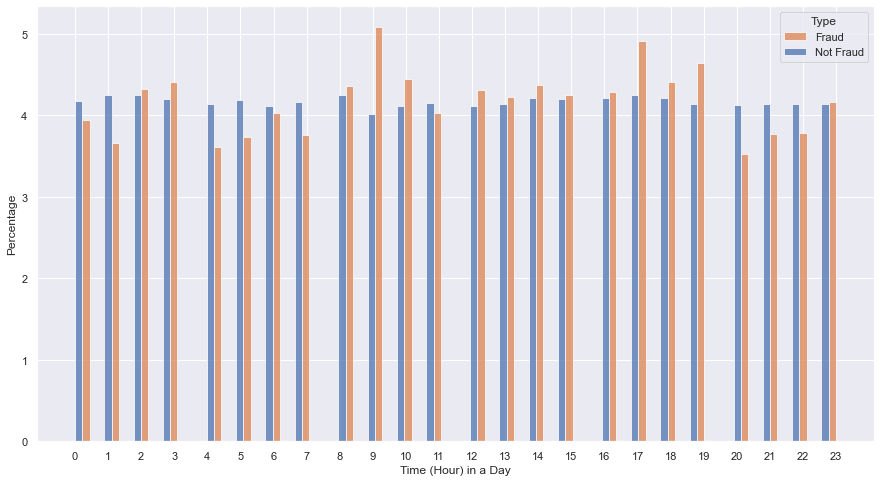

In [8]:
df['hour']=pd.to_datetime(df['purchase_time']).dt.hour
ax=sns.histplot(data=df, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [10]:
df.head()

,signup_time,purchase_time,purchase_value,source,browser,sex,age,is_fraud,hour
0,2015-02-24 22:55:49,2015-02-24 22:55:49,34,SEO,Chrome,M,39,0,22
1,2015-06-07 20:39:50,2015-06-07 20:39:50,16,Ads,Chrome,F,53,0,20
2,2015-01-01 18:52:44,2015-01-01 18:52:44,15,SEO,Opera,M,53,1,18
3,2015-04-28 21:13:25,2015-04-28 21:13:25,44,SEO,Safari,M,41,0,21
4,2015-07-21 07:09:52,2015-07-21 07:09:52,39,Ads,Safari,M,45,0,7


Il existe des pics des transactions frauduleuses à 9h, 17h et 19h

Tendance jour 

<ipython-input-9-27afe8af0642>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])


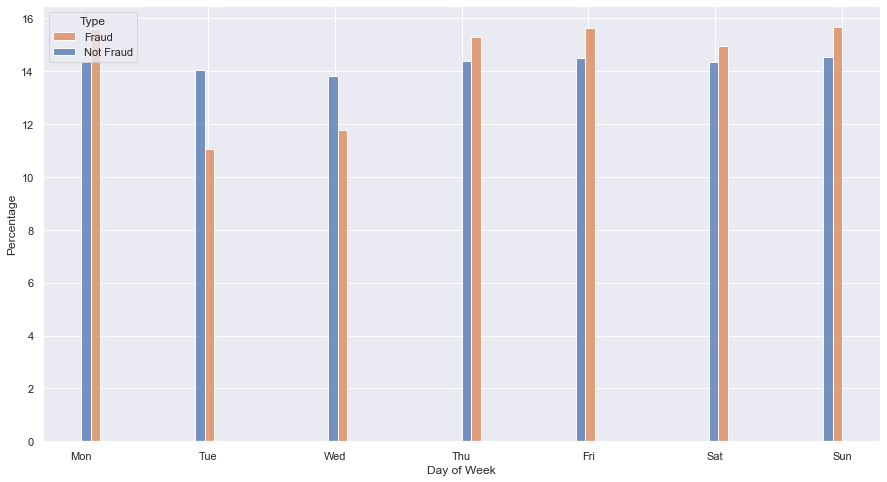

In [9]:
#day of week vs fraud
df['day']=pd.to_datetime(df['purchase_time']).dt.dayofweek
ax=sns.histplot(data=df, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

il existe de pics le lundi, le jeudi, le vendredi et le dimanche

Tendance mois

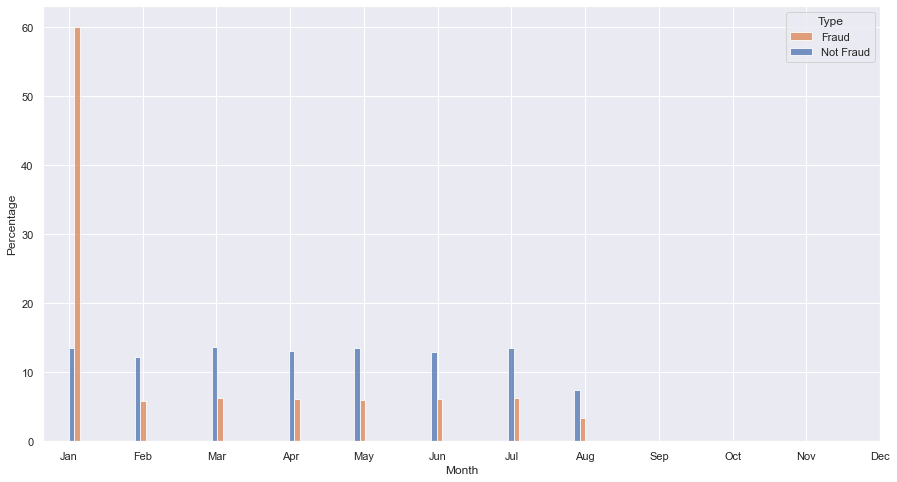

In [10]:
#month vs fraud
df['month']=pd.to_datetime(df['purchase_time']).dt.month
ax=sns.histplot(data=df, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Les transactions enregistrées ont eu lieu de janvier à août
Gros pic des transactions frauduleuses en janvier, peut-être suite aux fêtes de fin d'année

Machine learning

In [11]:
df.head()

,signup_time,purchase_time,purchase_value,source,browser,sex,age,is_fraud,hour,day,month
0,2015-02-24 22:55:49,2015-02-24 22:55:49,34,SEO,Chrome,M,39,0,22,1,2
1,2015-06-07 20:39:50,2015-06-07 20:39:50,16,Ads,Chrome,F,53,0,20,6,6
2,2015-01-01 18:52:44,2015-01-01 18:52:44,15,SEO,Opera,M,53,1,18,3,1
3,2015-04-28 21:13:25,2015-04-28 21:13:25,44,SEO,Safari,M,41,0,21,1,4
4,2015-07-21 07:09:52,2015-07-21 07:09:52,39,Ads,Safari,M,45,0,7,1,7


In [12]:
# suppressions des variables 'signup_time' et 'purchase_time'
df1 = df.drop(['signup_time', 'purchase_time'], axis =1)
df1.head()

,purchase_value,source,browser,sex,age,is_fraud,hour,day,month
0,34,SEO,Chrome,M,39,0,22,1,2
1,16,Ads,Chrome,F,53,0,20,6,6
2,15,SEO,Opera,M,53,1,18,3,1
3,44,SEO,Safari,M,41,0,21,1,4
4,39,Ads,Safari,M,45,0,7,1,7


Nous sommes face à un problème d'apprentissage supervisé car il existe une variable cible, la variable 'is_fraud'. La variable 'is_fraud' est qualitative, il s'agit donc d'un problème de classification. Pour permettre le fonctionnement des algorithmes de prédiction, nous proposons d'encoder grâce à la méthode 'One Hot Encoding' des variables qualitatives 'source', 'browser', 'sex'. 

In [13]:
df2 = pd.get_dummies(df1, columns = ['source', 'browser', 'sex'])
df2.head()

,purchase_value,age,is_fraud,hour,day,month,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
0,34,39,0,22,1,2,0,0,1,1,0,0,0,0,0,1
1,16,53,0,20,6,6,1,0,0,1,0,0,0,0,1,0
2,15,53,1,18,3,1,0,0,1,0,0,0,1,0,0,1
3,44,41,0,21,1,4,0,0,1,0,0,0,0,1,0,1
4,39,45,0,7,1,7,1,0,0,0,0,0,0,1,0,1


Nous procédons à la désignation des variables explicatives et de la variable cible.

In [14]:
# les variables explicatives
X = df2.drop(['is_fraud'], axis = 1)
# la variable cible
y = df2['is_fraud']

In [15]:
X.head()

,purchase_value,age,hour,day,month,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
0,34,39,22,1,2,0,0,1,1,0,0,0,0,0,1
1,16,53,20,6,6,1,0,0,1,0,0,0,0,1,0
2,15,53,18,3,1,0,0,1,0,0,0,1,0,0,1
3,44,41,21,1,4,0,0,1,0,0,0,0,1,0,1
4,39,45,7,1,7,1,0,0,0,0,0,0,1,0,1


In [16]:
# les variables explicatives
X_2 = df2.drop(['is_fraud'], axis = 1)
# la variable cible
y_2 = df2['is_fraud']

In [17]:
X_2.head()

,purchase_value,age,hour,day,month,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
0,34,39,22,1,2,0,0,1,1,0,0,0,0,0,1
1,16,53,20,6,6,1,0,0,1,0,0,0,0,1,0
2,15,53,18,3,1,0,0,1,0,0,0,1,0,0,1
3,44,41,21,1,4,0,0,1,0,0,0,0,1,0,1
4,39,45,7,1,7,1,0,0,0,0,0,0,1,0,1


In [18]:
from collections import Counter
from sklearn.datasets import make_classification
X_2, y_2 = make_classification(n_samples=151112, n_features=15,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           weights=[0.8, 0.2],
                           class_sep=0.8, random_state=0)
# class distribution
print(Counter(y))
print(Counter(y_2))

Counter({0: 136961, 1: 14151})
Counter({0: 120400, 1: 30712})


In [19]:
X_2[0]

array([-0.33225667,  0.81409547,  0.55071934, -0.51205733,  0.20936434,
       -0.79315262, -1.01663328, -0.47634431,  1.21749682,  1.19815195,
       -1.21036562, -1.38924262, -0.07820605,  0.82914616,  0.02649766])

In [73]:

help(make_classification)

Help on function make_classification in module sklearn.datasets._samples_generator:

make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
    Generate a random n-class classification problem.
    
    This initially creates clusters of points normally distributed (std=1)
    about vertices of an ``n_informative``-dimensional hypercube with sides of
    length ``2*class_sep`` and assigns an equal number of clusters to each
    class. It introduces interdependence between these features and adds
    various types of further noise to the data.
    
    Without shuffling, ``X`` horizontally stacks features in the following
    order: the primary ``n_informative`` features, followed by ``n_redundant``
    linear combinations of the informative features, followed by ``n_repeated``
    duplicates, dr

In [20]:
#import de la fonction train_test_split
from sklearn.model_selection import train_test_split

#séparation des jeux de test et d'entrainement
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42, stratify =y)


In [21]:
#import de la fonction train_test_split
from sklearn.model_selection import train_test_split

#séparation des jeux de test et d'entrainement
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,y_2,test_size=0.2, random_state = 42, stratify =y_2)

In [22]:
#Normalisation des données d'entraînement et de test.
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [23]:
#Normalisation des données d'entraînement et de test.
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_2 = MinMaxScaler()
X_train_norm_2 = scaler_2.fit_transform(X_train_2)
X_test_norm_2 = scaler_2.transform(X_test_2)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
### Regression logistique 

LogReg = LogisticRegression(solver='newton-cg')

# Entrainement 
LogReg.fit(X_train_norm, y_train)

# Prédiction 
y_pred = LogReg.predict(X_test_norm)

# on effectue les prédictions sur X_train_norm
y_pred_train = LogReg.predict(X_train_norm)

# on effectue les prédictions sur X_test_norm
y_pred_test = LogReg.predict(X_test_norm)

# on calcule les coefficients
coef_ = LogReg.coef_

# on calcule les odd-ratios
odd_ratios = np.exp(LogReg.coef_)

# on calcule l'intercept
intercept_ = LogReg.intercept_

# création d'un DataFrame qui comporte les variables, les coefficients et les odd-ratios
resultats_LogReg = pd.DataFrame(X.columns, columns = ['Variables'])
resultats_LogReg['Coefficients'] = LogReg.coef_.tolist()[0]
resultats_LogReg['Odd_ratios'] = np.exp(LogReg.coef_).tolist()[0]

resultats_LogReg[(resultats_LogReg.Odd_ratios == min(resultats_LogReg.Odd_ratios)) | (resultats_LogReg.Odd_ratios == max(resultats_LogReg.Odd_ratios))]


,Variables,Coefficients,Odd_ratios
1,age,0.131424,1.140451
4,month,-2.939123,0.052912


In [47]:
resultats_LogReg

,Variables,Coefficients,Odd_ratios
0,purchase_value,0.062794,1.064808
1,age,0.131424,1.140451
2,hour,0.018658,1.018833
3,day,0.081500,1.084913
4,month,-2.939123,0.052912
5,source_Ads,-0.037713,0.962989
6,source_Direct,0.119634,1.127084
7,source_SEO,-0.081921,0.921345
8,browser_Chrome,0.061311,1.063230
9,browser_FireFox,0.038781,1.039543


La variable 'age' a l'Odd_ratio le plus élevé, quand l'age augmente cela multiplie la probabilité d'appartenir à la classe positive de la variable 'is_fraud' par 1,14

In [27]:
# Import de la matrice de confusion
from sklearn.metrics import confusion_matrix

# Import de la fonction accuracy_score
from sklearn.metrics import accuracy_score

# Import de la fonction balanced_accuracy_score
from sklearn.metrics import balanced_accuracy_score

# Calcul de la matrice de confusion
print('LogisticRegression, Matrice de confusion:\n ',confusion_matrix(y_test, y_pred_test))

# On peut également afficher la signification de chaque élément de la matrice lorsque l'on a une problématique binaire

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_test).ravel()

print("\n Vrais négatifs:",tn,"\n Faux positifs:",fp,"\n Faux négatifs:",fn,"\n Vrais positifs:",tp)


# calcul de l'accuracy_score
accuracy = accuracy_score(y_test, y_pred_test)

# affichage de l'accuracy_score
print('\nAccuracy train LogReg:\n', accuracy_score(y_train, y_pred_train))
print('Accuracy test LogReg:\n', accuracy_score(y_test, y_pred_test))


# Vérification de la répartition des classes
print('La répartition des classes:\n', y.value_counts())

# Affichage de l'accuracy_score
print('\nbalanced_accuracy_score test LogReg:\n', balanced_accuracy_score(y_test, y_pred_test))
print('balanced_accuracy_score train LogReg:\n', balanced_accuracy_score(y_train, y_pred_train))

LogisticRegression, Matrice de confusion:
  [[27393     0]
 [ 2830     0]]

 Vrais négatifs: 27393 
 Faux positifs: 0 
 Faux négatifs: 2830 
 Vrais positifs: 0

Accuracy train LogReg:
 0.9063521081322535
Accuracy test LogReg:
 0.9063627039010026
La répartition des classes:
 0    136961
1     14151
Name: is_fraud, dtype: int64

balanced_accuracy_score test LogReg:
 0.5
balanced_accuracy_score train LogReg:
 0.5


On constate ainsi qu'aucune transaction frauduleuses n'a été correctement classé sur 2830. Il y a donc 2830 transactions qui sont considéréés comme non frauduleuses alors qu'en réalité, oui.

Concernant les transactions non frauduleuses, 27393 sont correctement classés sur 27393.

Le modèle LogisticRegression prédit mieux les transactions non frauduleuses que celles qui sont frauduleuses.

De plus, les balanced_accuracy sont loin des accuracy, ce qui confirme que le modèle LogisticRegression est victime du déséquilibre des classes.

Nous proposons d'essayer le modèle de prédiction KNeighborsClassifier()

In [28]:
KNN = KNeighborsClassifier()

KNN.fit(X_train_norm, y_train)

y_pred_train_knn = KNN.predict(X_train_norm)
y_pred_knn = KNN.predict(X_test_norm)

# Calcul de la matrice de confusion
print('KNN, Matrice de confusion:\n ',confusion_matrix(y_test, y_pred_knn))

# On peut également afficher la signification de chaque élément de la matrice lorsque l'on a une problématique binaire

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_knn).ravel()

print("\n Vrais négatifs knn:",tn,"\n Faux positifs knn:",fp,"\n Faux négatifs knn:",fn,"\n Vrais positifs knn:",tp)


# calcul de l'accuracy_score
accuracy = accuracy_score(y_test, y_pred_knn)

# affichage de l'accuracy_score
print('\nAccuracy train KNN:\n', accuracy_score(y_train, y_pred_train_knn))
print('Accuracy test KNN:\n', accuracy_score(y_test, y_pred_knn))


# Vérification de la répartition des classes
print('La répartition des classes:\n', y.value_counts())

# Affichage de l'accuracy_score
print('balanced_accuracy_score train KNN:\n', balanced_accuracy_score(y_train, y_pred_train_knn))
print('\nbalanced_accuracy_score test KNN :\n', balanced_accuracy_score(y_test, y_pred_knn))


KNN, Matrice de confusion:
  [[26762   631]
 [ 1321  1509]]

 Vrais négatifs knn: 26762 
 Faux positifs knn: 631 
 Faux négatifs knn: 1321 
 Vrais positifs knn: 1509

Accuracy train KNN:
 0.9423851632489308
Accuracy test KNN:
 0.9354134268603381
La répartition des classes:
 0    136961
1     14151
Name: is_fraud, dtype: int64
balanced_accuracy_score train KNN:
 0.7683827097702237

balanced_accuracy_score test KNN :
 0.7550902328739681


On constate ainsi que 1508 transactions frauduleuses sont correctement classées sur 1322 + 1508 = 2830 transactions. Il y a donc 1322 transactions qui ne sont pas considérés comme frauduleuses alors qu'en réalité, oui.

Concernant les transactions non frauduleuses, 27072 sont correctement classés sur 27393.

Le modèle KNeighborsClassifier prédit mieux les transactions non frauduleuses que celles qui sont frauduleuses.

De plus, les balanced_accuracy sont loin des accuracy, ce qui confirme que le modèle LogisticRegression est victime du déséquilibre des classes.

Nous proposons d'essayer le modèle de prédiction DecisionTreeClassifier

In [31]:
DTC = DecisionTreeClassifier()

DTC.fit(X_train_norm, y_train)

y_pred_train_DTC = DTC.predict(X_train_norm)
y_pred_DTC = DTC.predict(X_test_norm)

# Calcul de la matrice de confusion
print('DTC, Matrice de confusion:\n ',confusion_matrix(y_test, y_pred_DTC))

# On peut également afficher la signification de chaque élément de la matrice lorsque l'on a une problématique binaire

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_DTC).ravel()

print("\n Vrais négatifs DTC:",tn,"\n Faux positifs DTC:",fp,"\n Faux négatifs DTC:",fn,"\n Vrais positifs DTC:",tp)


# calcul de l'accuracy_score
accuracy = accuracy_score(y_test, y_pred_DTC)

# affichage de l'accuracy_score
print('\nAccuracy train DTC:\n', accuracy_score(y_train, y_pred_train_DTC))
print('Accuracy test DTC:\n', accuracy_score(y_test, y_pred_DTC))


# Vérification de la répartition des classes
print('La répartition des classes:\n', y.value_counts())

# Affichage de l'accuracy_score
print('balanced_accuracy_score train DTC:\n', balanced_accuracy_score(y_train, y_pred_train_DTC))
print('\nbalanced_accuracy_score test DTC :\n', balanced_accuracy_score(y_test, y_pred_DTC))

DTC, Matrice de confusion:
  [[25404  1989]
 [ 1241  1589]]

 Vrais négatifs DTC: 25404 
 Faux positifs DTC: 1989 
 Faux négatifs DTC: 1241 
 Vrais positifs DTC: 1589

Accuracy train DTC:
 0.9950698574725575
Accuracy test DTC:
 0.8931277503887768
La répartition des classes:
 0    136961
1     14151
Name: is_fraud, dtype: int64
balanced_accuracy_score train DTC:
 0.9967653974672668

balanced_accuracy_score test DTC :
 0.7444371540587282


On constate ainsi que 1592 transactions frauduleuses sont correctement classées sur 1238 + 1592 = 2830 transactions. Il y a donc 1238 transactions qui ne sont pas considérés comme frauduleuses alors qu'en réalité, oui.

Concernant les transactions non frauduleuses, 25427 sont correctement classés sur 27393.

Le modèle DecisionTreeClassifier prédit mieux les transactions non frauduleuses que celles qui sont frauduleuses.

De plus, à l'entrainement les balanced_accuracy sont proches des accuracy, mais en phase de test moins ce qui confirme le modèle DecisionTreeClassifier est victime du déséquilibre des classes en phase de test.

In [33]:
DTC_2 = DecisionTreeClassifier()

DTC_2.fit(X_train_norm_2, y_train_2)

y_pred_train_DTC_2 = DTC_2.predict(X_train_norm_2)
y_pred_DTC_2 = DTC_2.predict(X_test_norm_2)

# Calcul de la matrice de confusion
print('DTC_2, Matrice de confusion:\n ',confusion_matrix(y_test_2, y_pred_DTC_2))

# On peut également afficher la signification de chaque élément de la matrice lorsque l'on a une problématique binaire

tn, fp, fn, tp = confusion_matrix(y_test_2,y_pred_DTC_2).ravel()

print("\n Vrais négatifs DTC_2:",tn,"\n Faux positifs DTC_2:",fp,"\n Faux négatifs DTC_2:",fn,"\n Vrais positifs DTC_2:",tp)


# calcul de l'accuracy_score
accuracy = accuracy_score(y_test_2, y_pred_DTC_2)


# affichage de l'accuracy_score
print('\nAccuracy train DTC_2:\n', accuracy_score(y_train_2, y_pred_train_DTC_2))
print('Accuracy test DTC_2:\n', accuracy_score(y_test_2, y_pred_DTC_2))


# Vérification de la répartition des classes
print('La répartition des classes:\n', Counter(y_2))

# Affichage de l'accuracy_score
print('balanced_accuracy_score train DTC_2:\n', balanced_accuracy_score(y_train_2, y_pred_train_DTC_2))
print('\nbalanced_accuracy_score test DTC_2 :\n', balanced_accuracy_score(y_test_2, y_pred_DTC_2))

DTC_2, Matrice de confusion:
  [[22344  1736]
 [ 1550  4593]]

 Vrais négatifs DTC_2: 22344 
 Faux positifs DTC_2: 1736 
 Faux négatifs DTC_2: 1550 
 Vrais positifs DTC_2: 4593

Accuracy train DTC_2:
 1.0
Accuracy test DTC_2:
 0.8912748568970652
La répartition des classes:
 Counter({0: 120400, 1: 30712})
balanced_accuracy_score train DTC_2:
 1.0

balanced_accuracy_score test DTC_2 :
 0.8377936316245755


Nous proposons d'essayer le modèle de prédiction SVC

In [34]:
SVC = SVC()

SVC.fit(X_train_norm, y_train)

y_pred_train_SVC = SVC.predict(X_train_norm)
y_pred_SVC = SVC.predict(X_test_norm)

# Calcul de la matrice de confusion
print('SVC, Matrice de confusion:\n ',confusion_matrix(y_test, y_pred_SVC))

# On peut également afficher la signification de chaque élément de la matrice lorsque l'on a une problématique binaire

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_SVC).ravel()

print("\n Vrais négatifs SVC:",tn,"\n Faux positifs SVC:",fp,"\n Faux négatifs SVC:",fn,"\n Vrais positifs SVC:",tp)


# calcul de l'accuracy_score
accuracy = accuracy_score(y_test, y_pred_SVC)

# affichage de l'accuracy_score
print('\nAccuracy train SVC:\n', accuracy_score(y_train, y_pred_train_SVC))
print('Accuracy test SVC:\n', accuracy_score(y_test, y_pred_SVC))


# Vérification de la répartition des classes
print('La répartition des classes:\n', y.value_counts())

# Affichage de l'accuracy_score
print('balanced_accuracy_score train SVC:\n', balanced_accuracy_score(y_train, y_pred_train_SVC))
print('\nbalanced_accuracy_score test SVC :\n', balanced_accuracy_score(y_test, y_pred_SVC))

SVC, Matrice de confusion:
  [[27393     0]
 [ 2830     0]]

 Vrais négatifs SVC: 27393 
 Faux positifs SVC: 0 
 Faux négatifs SVC: 2830 
 Vrais positifs SVC: 0

Accuracy train SVC:
 0.9063521081322535
Accuracy test SVC:
 0.9063627039010026
La répartition des classes:
 0    136961
1     14151
Name: is_fraud, dtype: int64
balanced_accuracy_score train SVC:
 0.5

balanced_accuracy_score test SVC :
 0.5


In [39]:
RFC = RandomForestClassifier()

RFC.fit(X_train_norm, y_train)

y_pred_train_RFC = RFC.predict(X_train_norm)
y_pred_RFC = RFC.predict(X_test_norm)

# Calcul de la matrice de confusion
print('RFC, Matrice de confusion:\n ',confusion_matrix(y_test, y_pred_RFC))

# On peut également afficher la signification de chaque élément de la matrice lorsque l'on a une problématique binaire

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RFC).ravel()

print("\n Vrais négatifs RFC:",tn,"\n Faux positifs RFC:",fp,"\n Faux négatifs RFC:",fn,"\n Vrais positifs RFC:",tp)


# calcul de l'accuracy_score
accuracy = accuracy_score(y_test, y_pred_RFC)

# affichage de l'accuracy_score
print('\nAccuracy train RFC:\n', accuracy_score(y_train, y_pred_train_RFC))
print('Accuracy test RFC:\n', accuracy_score(y_test, y_pred_RFC))


# Vérification de la répartition des classes
print('La répartition des classes:\n', y.value_counts())

# Affichage de l'accuracy_score
print('balanced_accuracy_score train RFC:\n', balanced_accuracy_score(y_train, y_pred_train_RFC))
print('\nbalanced_accuracy_score test RFC :\n', balanced_accuracy_score(y_test, y_pred_RFC))

RFC, Matrice de confusion:
  [[27224   169]
 [ 1330  1500]]

 Vrais négatifs RFC: 27224 
 Faux positifs RFC: 169 
 Faux négatifs RFC: 1330 
 Vrais positifs RFC: 1500

Accuracy train RFC:
 0.9949788649091316
Accuracy test RFC:
 0.9504020117129338
La répartition des classes:
 0    136961
1     14151
Name: is_fraud, dtype: int64
balanced_accuracy_score train RFC:
 0.9962795746600943

balanced_accuracy_score test RFC :
 0.7619329381690585


In [35]:
RFC_2 = RandomForestClassifier()

RFC_2.fit(X_train_norm_2, y_train_2)

y_pred_train_RFC_2 = RFC_2.predict(X_train_norm_2)
y_pred_RFC_2 = RFC_2.predict(X_test_norm_2)

# Calcul de la matrice de confusion
print('RFC, Matrice de confusion:\n ',confusion_matrix(y_test_2, y_pred_RFC_2))

# On peut également afficher la signification de chaque élément de la matrice lorsque l'on a une problématique binaire

tn, fp, fn, tp = confusion_matrix(y_test_2,y_pred_RFC_2).ravel()

print("\n Vrais négatifs RFC_2:",tn,"\n Faux positifs RFC_2:",fp,"\n Faux négatifs RFC_2:",fn,"\n Vrais positifs RFC_2:",tp)


# calcul de l'accuracy_score
accuracy = accuracy_score(y_test_2, y_pred_RFC_2)

# affichage de l'accuracy_score
print('\nAccuracy train RFC:\n', accuracy_score(y_train_2, y_pred_train_RFC_2))
print('Accuracy test RFC:\n', accuracy_score(y_test_2, y_pred_RFC_2))


# Vérification de la répartition des classes
print('La répartition des classes:\n', Counter(y_2))

# Affichage de l'accuracy_score
print('balanced_accuracy_score train RFC:\n', balanced_accuracy_score(y_train_2, y_pred_train_RFC_2))
print('\nbalanced_accuracy_score test RFC :\n', balanced_accuracy_score(y_test_2, y_pred_RFC_2))

RFC, Matrice de confusion:
  [[23280   800]
 [ 1444  4699]]

 Vrais négatifs RFC_2: 23280 
 Faux positifs RFC_2: 800 
 Faux négatifs RFC_2: 1444 
 Vrais positifs RFC_2: 4699

Accuracy train RFC:
 0.9999917279487794
Accuracy test RFC:
 0.9257519107964133
La répartition des classes:
 Counter({0: 120400, 1: 30712})
balanced_accuracy_score train RFC:
 0.9999796491513696

balanced_accuracy_score test RFC :
 0.8658565539038303


In [41]:
BC = BaggingClassifier()

BC.fit(X_train_norm, y_train)

y_pred_train_BC = BC.predict(X_train_norm)
y_pred_BC = BC.predict(X_test_norm)

# Calcul de la matrice de confusion
print('BC, Matrice de confusion:\n ',confusion_matrix(y_test, y_pred_BC))

# On peut également afficher la signification de chaque élément de la matrice lorsque l'on a une problématique binaire

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_BC).ravel()

print("\n Vrais négatifs BC:",tn,"\n Faux positifs BC:",fp,"\n Faux négatifs BC:",fn,"\n Vrais positifs BC:",tp)


# calcul de l'accuracy_score
accuracy = accuracy_score(y_test, y_pred_BC)

# affichage de l'accuracy_score
print('\nAccuracy train BC:\n', accuracy_score(y_train, y_pred_train_BC))
print('Accuracy test BC:\n', accuracy_score(y_test, y_pred_BC))


# Vérification de la répartition des classes
print('La répartition des classes:\n', y.value_counts())

# Affichage de l'accuracy_score
print('balanced_accuracy_score train BC:\n', balanced_accuracy_score(y_train, y_pred_train_BC))
print('\nbalanced_accuracy_score test BC :\n', balanced_accuracy_score(y_test, y_pred_BC))

BC, Matrice de confusion:
  [[27163   230]
 [ 1328  1502]]

 Vrais négatifs BC: 27163 
 Faux positifs BC: 230 
 Faux négatifs BC: 1328 
 Vrais positifs BC: 1502

Accuracy train BC:
 0.9850441313932616
Accuracy test BC:
 0.9484498560698805
La répartition des classes:
 0    136961
1     14151
Name: is_fraud, dtype: int64
balanced_accuracy_score train BC:
 0.943632580594552

balanced_accuracy_score test BC :
 0.7611728719222199


In [36]:
BC_2 = BaggingClassifier()

BC_2.fit(X_train_norm_2, y_train_2)

y_pred_train_BC_2 = BC_2.predict(X_train_norm_2)
y_pred_BC_2 = BC_2.predict(X_test_norm_2)

# Calcul de la matrice de confusion
print('BC_2, Matrice de confusion:\n ',confusion_matrix(y_test_2, y_pred_BC_2))

# On peut également afficher la signification de chaque élément de la matrice lorsque l'on a une problématique binaire

tn, fp, fn, tp = confusion_matrix(y_test_2,y_pred_BC_2).ravel()

print("\n Vrais négatifs BC_2:",tn,"\n Faux positifs BC_2:",fp,"\n Faux négatifs BC_2:",fn,"\n Vrais positifs BC_2:",tp)


# calcul de l'accuracy_score
accuracy = accuracy_score(y_test_2, y_pred_BC_2)

# affichage de l'accuracy_score
print('\nAccuracy train BC_2:\n', accuracy_score(y_train_2, y_pred_train_BC_2))
print('Accuracy test BC_2:\n', accuracy_score(y_test_2, y_pred_BC_2))


# Vérification de la répartition des classes
print('La répartition des classes:\n', Counter(y_2))

# Affichage de l'accuracy_score
print('balanced_accuracy_score train BC_2:\n', balanced_accuracy_score(y_train_2, y_pred_train_BC_2))
print('\nbalanced_accuracy_score test BC_2 :\n', balanced_accuracy_score(y_test_2, y_pred_BC_2))

BC_2, Matrice de confusion:
  [[23357   723]
 [ 1632  4511]]

 Vrais négatifs BC_2: 23357 
 Faux positifs BC_2: 723 
 Faux négatifs BC_2: 1632 
 Vrais positifs BC_2: 4511

Accuracy train BC_2:
 0.9933244546650233
Accuracy test BC_2:
 0.9220792111967707
La répartition des classes:
 Counter({0: 120400, 1: 30712})
balanced_accuracy_score train BC_2:
 0.9845925730101908

balanced_accuracy_score test BC_2 :
 0.8521534213914982


In [37]:
GBC = GradientBoostingClassifier()

GBC.fit(X_train_norm, y_train)

y_pred_train_GBC = GBC.predict(X_train_norm)
y_pred_GBC = GBC.predict(X_test_norm)

# Calcul de la matrice de confusion
print('GBC, Matrice de confusion:\n ',confusion_matrix(y_test, y_pred_GBC))

# On peut également afficher la signification de chaque élément de la matrice lorsque l'on a une problématique binaire

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_GBC).ravel()

print("\n Vrais négatifs GBC:",tn,"\n Faux positifs GBC:",fp,"\n Faux négatifs GBC:",fn,"\n Vrais positifs GBC:",tp)


# calcul de l'accuracy_score
accuracy = accuracy_score(y_test, y_pred_GBC)

# affichage de l'accuracy_score
print('\nAccuracy train GBC:\n', accuracy_score(y_train, y_pred_train_GBC))
print('Accuracy test GBC:\n', accuracy_score(y_test, y_pred_GBC))


# Vérification de la répartition des classes
print('La répartition des classes:\n', y.value_counts())

# Affichage de l'accuracy_score
print('balanced_accuracy_score train GBC:\n', balanced_accuracy_score(y_train, y_pred_train_GBC))
print('\nbalanced_accuracy_score test GBC :\n', balanced_accuracy_score(y_test, y_pred_GBC))

GBC, Matrice de confusion:
  [[27386     7]
 [ 2816    14]]

 Vrais négatifs GBC: 27386 
 Faux positifs GBC: 7 
 Faux négatifs GBC: 2816 
 Vrais positifs GBC: 14

Accuracy train GBC:
 0.906831887103045
Accuracy test GBC:
 0.9065943155874665
La répartition des classes:
 0    136961
1     14151
Name: is_fraud, dtype: int64
balanced_accuracy_score train GBC:
 0.5031556461687124

balanced_accuracy_score test GBC :
 0.502345728365001


In [42]:
print('En résumé, nous obtenons les performances suivantes :\n')

print('\nAccuracy test LogReg:', accuracy_score(y_test, y_pred_test).round(2))
print('Balanced_accuracy_score test LogReg:', balanced_accuracy_score(y_test, y_pred).round(2))

print('\nAccuracy test KNN:', accuracy_score(y_test, y_pred_knn).round(2))
print('Balanced_accuracy_score test KNN :', balanced_accuracy_score(y_test, y_pred_knn).round(2))

print('\nAccuracy test SVC:', accuracy_score(y_test, y_pred_SVC).round(2))
print('Balanced_accuracy_score test SVC :', balanced_accuracy_score(y_test, y_pred_SVC).round(2))

print('\nAccuracy test DTC:', accuracy_score(y_test, y_pred_DTC).round(2))
print('Balanced_accuracy_score test DTC :', balanced_accuracy_score(y_test_2, y_pred_DTC_2).round(2))

print('\nAccuracy test RFC:', accuracy_score(y_test, y_pred_RFC).round(2))
print('Balanced_accuracy_score test RFC :', balanced_accuracy_score(y_test_2, y_pred_RFC_2).round(2))

print('\nAccuracy test BC:', accuracy_score(y_test, y_pred_BC).round(2))
print('Balanced_accuracy_score test BC :', balanced_accuracy_score(y_test_2, y_pred_BC_2).round(2))

print('\nAccuracy test GBC:', accuracy_score(y_test, y_pred_GBC).round(2))
print('Balanced_accuracy_score test GBC :', balanced_accuracy_score(y_test, y_pred_GBC).round(2))


En résumé, nous obtenons les performances suivantes :


Accuracy test LogReg: 0.91
Balanced_accuracy_score test LogReg: 0.5

Accuracy test KNN: 0.94
Balanced_accuracy_score test KNN : 0.76

Accuracy test SVC: 0.91
Balanced_accuracy_score test SVC : 0.5

Accuracy test DTC: 0.89
Balanced_accuracy_score test DTC : 0.84

Accuracy test RFC: 0.95
Balanced_accuracy_score test RFC : 0.87

Accuracy test BC: 0.95
Balanced_accuracy_score test BC : 0.85

Accuracy test GBC: 0.91
Balanced_accuracy_score test GBC : 0.5


Préparation pour API

In [43]:
from joblib import dump
from joblib import load

# definition d'une fonction qui permet de sauvegarder les modèles
def save_model(model, path_to_model): 
    # saving model
    print(str(model), 'saved at ', path_to_model)
    dump(model, path_to_model)

# Entrainement des modèles par la méthode de cross validation¶

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

def compute_model_score(model, X, y):
    kf_2 = KFold(n_splits = 5, shuffle = True, random_state = 42)
# computing cross val

    cross_validation = cross_val_score(

    model,

    X,

    y,

    cv=kf_2,

    scoring='accuracy')

    model_score = cross_validation.mean()

    return model_score

In [49]:
score_LR = round(compute_model_score(LogReg, X, y),2)
score_KNN = compute_model_score(KNN, X, y).round(2)
score_SVC = compute_model_score(SVC, X, y).round(2)
score_DTC = compute_model_score(DTC_2, X_2, y_2).round(2)
score_RFC = compute_model_score(RFC_2, X_2, y_2).round(2)
score_BC = compute_model_score(BC_2, X_2, y_2).round(2)
score_GBC = compute_model_score(GBC, X, y).round(2)

In [50]:
# Import de la fonction balanced_accuracy_score
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score_LR = balanced_accuracy_score(y_test, y_pred).round(2)
balanced_accuracy_score_KNN = balanced_accuracy_score(y_test, y_pred_knn).round(2)
balanced_accuracy_score_SVC = balanced_accuracy_score(y_test, y_pred_SVC).round(2)
balanced_accuracy_score_DTC = balanced_accuracy_score(y_test_2, y_pred_DTC_2).round(2)
balanced_accuracy_score_RFC = balanced_accuracy_score(y_test_2, y_pred_RFC_2).round(2)
balanced_accuracy_score_BC = balanced_accuracy_score(y_test_2, y_pred_BC_2).round(2)
balanced_accuracy_score_GBC = balanced_accuracy_score(y_test, y_pred_GBC).round(2)

In [51]:
score_dic = {"Modele": ["LogReg", "KNN", "SVC", "DTC", "RFC", "BC", "GBC"],
             "balanced_accuracy_score" : [balanced_accuracy_score_LR, balanced_accuracy_score_KNN, balanced_accuracy_score_SVC, balanced_accuracy_score_DTC, balanced_accuracy_score_RFC, balanced_accuracy_score_BC, balanced_accuracy_score_GBC]
              }

In [52]:
score_dic_2 = {"Modele": ["LogReg", "KNN", "SVC", "DTC", "RFC", "BC", "GBC"],
             "Score" : [score_LR, score_KNN, score_SVC, score_DTC, score_RFC, score_BC, score_GBC]
              }

In [53]:
db_score = pd.DataFrame(score_dic)
db_score.head(7)

,Modele,balanced_accuracy_score
0,LogReg,0.50
1,KNN,0.76
2,SVC,0.50
3,DTC,0.84
4,RFC,0.87
5,BC,0.85
6,GBC,0.50


In [54]:
db_score_2 = pd.DataFrame(score_dic_2)
db_score_2.head(7)

,Modele,Score
0,LogReg,0.91
1,KNN,0.94
2,SVC,0.91
3,DTC,0.89
4,RFC,0.93
5,BC,0.92
6,GBC,0.91


In [55]:
sc_dic = {"LogReg": balanced_accuracy_score_LR, 
          "KNN"   : balanced_accuracy_score_KNN,
          "SVC"   : balanced_accuracy_score_SVC, 
          "DTC"   : balanced_accuracy_score_DTC, 
          "RFC"   : balanced_accuracy_score_RFC, 
          "BC"    : balanced_accuracy_score_BC,
          "GBC"   : balanced_accuracy_score_GBC            
         }

In [56]:
sc_dic_2 = {"LogReg": score_LR, 
          "KNN"   : score_KNN,
          "SVC"   : score_SVC, 
          "DTC"   : score_DTC, 
          "RFC"   : score_RFC, 
          "BC"    : score_BC,
          "GBC"   : score_GBC            
         }

In [58]:
import json
import os


filepath = "E:/Formation/Data_Science/Projets_DataScientest/fraud_detection/Modele/Perf"
if os.path.exists(filepath) == False:
        os.makedirs(filepath, mode = 511, exist_ok= False)
os.chdir(filepath)        
with open('score_ML.json', 'w') as fp:
    json.dump(sc_dic_2, fp, indent=3)

Sauvegarde des modèles entraînés et testés

In [97]:
save_model(LogReg, 'E:/Formation/Data_Science/Projets_DataScientest/fraud_detection/Modele/LogReg.pckl')
print("/n")
save_model(KNN, 'E:/Formation/Data_Science/Projets_DataScientest/fraud_detection/Modele/KNN.pckl')
print("/n")
save_model(SVC, 'E:/Formation/Data_Science/Projets_DataScientest/fraud_detection/Modele/SVC.pckl')
print("/n")
save_model(DTC_2, 'E:/Formation/Data_Science/Projets_DataScientest/fraud_detection/Modele/DTC_2.pckl')
print("/n")
save_model(RFC_2, 'E:/Formation/Data_Science/Projets_DataScientest/fraud_detection/Modele/RFC_2.pckl')
print("/n")
save_model(BC_2, 'E:/Formation/Data_Science/Projets_DataScientest/fraud_detection/Modele/BC_2.pckl')
print("/n")
save_model(GBC, 'E:/Formation/Data_Science/Projets_DataScientest/fraud_detection/Modele/GBC.pckl')

LogisticRegression(solver='newton-cg') saved at  E:/Formation/Data_Science/Projets_DataScientest/fraud_detection/Modele/LogReg.pckl
/n
KNeighborsClassifier() saved at  E:/Formation/Data_Science/Projets_DataScientest/fraud_detection/Modele/KNN.pckl
/n
SVC() saved at  E:/Formation/Data_Science/Projets_DataScientest/fraud_detection/Modele/SVC.pckl
/n
DecisionTreeClassifier() saved at  E:/Formation/Data_Science/Projets_DataScientest/fraud_detection/Modele/DTC_2.pckl
/n
RandomForestClassifier() saved at  E:/Formation/Data_Science/Projets_DataScientest/fraud_detection/Modele/RFC_2.pckl
/n
BaggingClassifier() saved at  E:/Formation/Data_Science/Projets_DataScientest/fraud_detection/Modele/BC_2.pckl
/n
GradientBoostingClassifier() saved at  E:/Formation/Data_Science/Projets_DataScientest/fraud_detection/Modele/GBC.pckl


Sauvegarde des scalers

In [60]:
save_model(scaler, 'E:/Formation/Data_Science/Projets_DataScientest/fraud_detection/Modele/scaler.pckl')
save_model(scaler_2, 'E:/Formation/Data_Science/Projets_DataScientest/fraud_detection/Modele/scaler_2.pckl')

MinMaxScaler() saved at  E:/Formation/Data_Science/Projets_DataScientest/fraud_detection/Modele/scaler.pckl
MinMaxScaler() saved at  E:/Formation/Data_Science/Projets_DataScientest/fraud_detection/Modele/scaler_2.pckl


In [101]:
X.head()

,purchase_value,age,hour,day,month,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
0,34,39,22,1,2,0,0,1,1,0,0,0,0,0,1
1,16,53,20,6,6,1,0,0,1,0,0,0,0,1,0
2,15,53,18,3,1,0,0,1,0,0,0,1,0,0,1
3,44,41,21,1,4,0,0,1,0,0,0,0,1,0,1
4,39,45,7,1,7,1,0,0,0,0,0,0,1,0,1


In [82]:
# Test prédiction
dic = {"purchase_value"                 : [15],
       "age"                            : [53],
       "hour"                           : [18],
       "day"                            : [3],
       "month"                          : [1],
       "source_Ads"                     : [0],      
       "source_Direct"                  : [0],   
       "source_SEO"                     : [1],  
       "browser_Chrome"                 : [0],       
       "browser_FireFox"                : [0],
       "browser_IE"                     : [0],
       "browser_Opera"                  : [1],
       "browser_Safari"                 : [0],
       "sex_F"                          : [0],
       "sex_M"                          : [1]}


In [83]:
db = pd.DataFrame(dic)
db

,purchase_value,age,hour,day,month,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
0,15,53,18,3,1,0,0,1,0,0,0,1,0,0,1


In [93]:
X_norm = scaler_2.transform(db)

In [94]:
X_norm

array([[2.21851291, 6.70298503, 2.64848927, 0.87025735, 0.61747367,
        0.47656701, 0.54413071, 0.57879812, 0.46465213, 0.50553469,
        0.59606661, 0.63714835, 0.55305643, 0.51993511, 0.64142241]])

In [98]:
BC_reloaded = load('E:/Formation/Data_Science/Projets_DataScientest/fraud_detection/Modele/BC_2.pckl')
RFC_reloaded = load('E:/Formation/Data_Science/Projets_DataScientest/fraud_detection/Modele/RFC_2.pckl')

In [99]:
y_res_BC = BC_reloaded.predict(X_norm)
y_res_RFC = RFC_reloaded.predict(X_norm)
print(y_res_BC)
print(y_res_RFC)


[1]
[1]
